# Performing clustering on Airline Data

## Hierarchial Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
data=pd.read_csv("EastWestAirlines.csv")

In [59]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [60]:
data1 = data.set_index(['ID#'])

In [61]:
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [62]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(data1.iloc[:,1:])

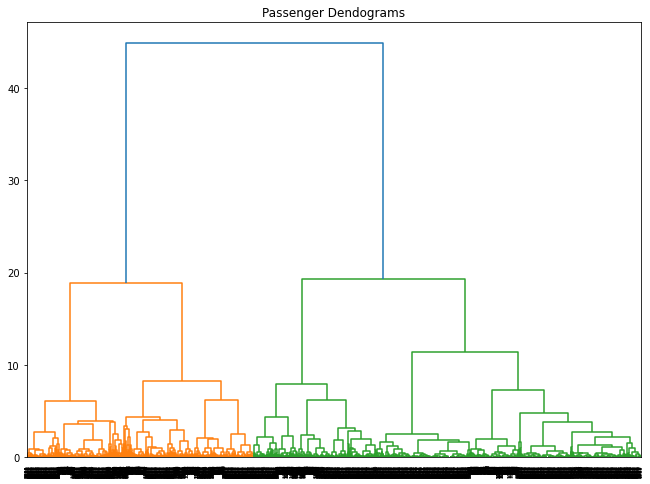

In [8]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(11,8))
plt.title("Passenger Dendograms")
dendogram = sch.dendrogram(sch.linkage(df_norm,method='ward'))

In [9]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [10]:
y_hc = hc.fit_predict(df_norm)

In [11]:
clusters=pd.DataFrame(y_hc,columns=['cluster'])

In [12]:
clusters

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,3
3995,3
3996,1
3997,0


# KMeans Clustering

## Elbow Curve for optimal number of clusters

In [13]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

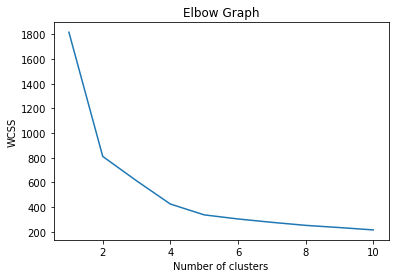

In [14]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# As per the curve,the number of clusters is 4

In [17]:
clust4=KMeans(4,random_state=30).fit(df_norm)
clust4

KMeans(n_clusters=4, random_state=30)

In [19]:
clust4.labels_

array([2, 2, 2, ..., 3, 2, 2])

In [20]:
data4=data.copy()
data4['clust4id']=clust4.labels_

In [43]:
clust4.cluster_centers_

array([[ 6.55837114e-03,  6.44122383e-01,  8.05152979e-04,
         5.63607085e-03,  1.18636504e-01,  2.00595439e-01,
         7.31260853e-03,  1.19405706e-02,  5.34640411e-01,
        -3.88578059e-16],
       [ 2.60542873e-02,  3.90044577e-02,  1.63447251e-02,
         2.22882615e-03,  3.35642727e-02,  1.21825219e-01,
         3.34267751e-02,  5.94073285e-02,  5.22892182e-01,
         1.00000000e+00],
       [ 8.28362120e-03,  2.31945177e-02,  8.96151819e-03,
         1.05429626e-03,  1.26482465e-02,  7.54496083e-02,
         7.35308092e-03,  1.24327389e-02,  4.36111859e-01,
         3.27515792e-15],
       [ 1.77912301e-02,  7.28960396e-01,  6.18811881e-04,
         6.49752475e-03,  1.72970238e-01,  2.34903868e-01,
         2.31602349e-02,  4.04212591e-02,  5.86139300e-01,
         1.00000000e+00]])

In [21]:
data4.groupby('clust4id').agg(['mean']).reset_index()

,clust4id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0
1,1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1
2,2,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0
3,3,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1


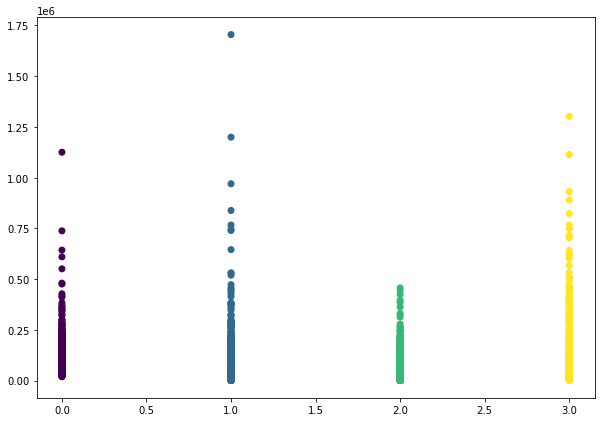

In [22]:
plt.figure(figsize=(10, 7))  
plt.scatter(data4['clust4id'],data4['Balance'], c=clust4.labels_)

In [23]:
# Cluster algorithm using K=5
clust5=KMeans(5,random_state=30).fit(df_norm)
clust5

KMeans(n_clusters=5, random_state=30)

In [24]:
clust5.labels_

array([0, 0, 0, ..., 1, 4, 4])

In [25]:
# Assign clusters to the data set
data5=data.copy()
data5['clust5id']=clust5.labels_

In [52]:
clust5.cluster_centers_

array([[ 8.06451613e-03,  3.05299539e-02,  9.79262673e-03,
         2.88018433e-04,  1.31485480e-02,  8.03906334e-02,
         7.91232441e-03,  1.37379358e-02,  6.71078504e-01,
         1.11022302e-15],
       [ 1.77912301e-02,  7.28960396e-01,  6.18811881e-04,
         6.49752475e-03,  1.72970238e-01,  2.34903868e-01,
         2.31602349e-02,  4.04212591e-02,  5.86139300e-01,
         1.00000000e+00],
       [ 6.59020789e-03,  6.46035599e-01,  8.09061489e-04,
         5.66343042e-03,  1.19022293e-01,  2.00383834e-01,
         7.27197078e-03,  1.18458814e-02,  5.32620376e-01,
        -4.44089210e-16],
       [ 2.60542873e-02,  3.90044577e-02,  1.63447251e-02,
         2.22882615e-03,  3.35642727e-02,  1.21825219e-01,
         3.34267751e-02,  5.94073285e-02,  5.22892182e-01,
         1.00000000e+00],
       [ 8.44382696e-03,  1.76841085e-02,  8.23643411e-03,
         1.69573643e-03,  1.23045313e-02,  7.17842978e-02,
         6.90692719e-03,  1.13902296e-02,  2.39980966e-01,
         3.

In [26]:
data5.groupby('clust5id').agg(['mean']).reset_index()

,clust5id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0
1,1,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1
2,2,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0
3,3,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1
4,4,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0


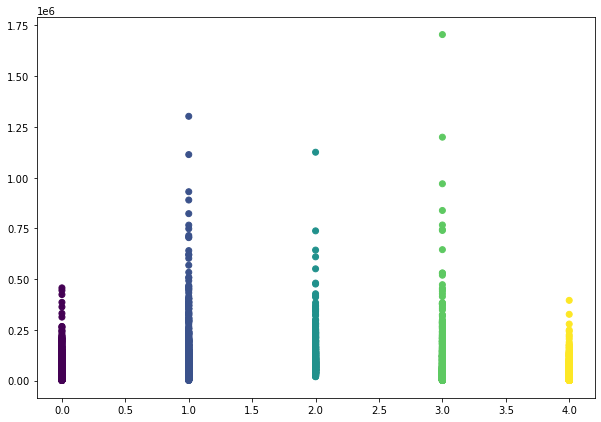

In [27]:
plt.figure(figsize=(10, 7))  
plt.scatter(data5['clust5id'],data5['Balance'], c=clust5.labels_)

# DBSCAN Clustering

In [83]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [86]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [87]:
data2=data.drop(['ID#'],axis=1)

In [88]:
data2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [89]:
array=data2.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [90]:
stscaler=StandardScaler().fit(array)
X=stscaler.transform(array)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [91]:
dbscan=DBSCAN(eps=0.8,min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [92]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [93]:
c1=pd.DataFrame(dbscan.labels_,columns=['cluster'])
c1

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [94]:
data3=pd.concat([c1,data2],axis=1)
data3

,cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,28143,0,1,1,1,174,1,0,0,7000,0
1,0,19244,0,1,1,1,215,2,0,0,6968,0
2,0,41354,0,1,1,1,4123,4,0,0,7034,0
3,0,14776,0,1,1,1,500,1,0,0,6952,0
4,-1,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1,18476,0,1,1,1,8525,4,200,1,1403,1
3995,1,64385,0,1,1,1,981,5,0,0,1395,1
3996,1,73597,0,3,1,1,25447,8,0,0,1402,1
3997,0,54899,0,1,1,1,500,1,500,1,1401,0


In [95]:
data3.cluster.value_counts()

 0    2216
 1     944
-1     820
 2      12
 3       7
Name: cluster, dtype: int64

In [96]:
data4=data3.groupby(data3.cluster).mean()
data4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
-1,158564.875610,698.553659,2.670732,1.056098,1.059756,35956.408537,20.157317,1805.067073,5.232927,4647.563415,0.654878
0,50589.121390,0.676895,1.629964,1.000000,1.000000,8534.324458,8.112365,85.902978,0.291065,3790.477888,0.000000
1,54510.457627,2.118644,2.543432,1.000000,1.000000,21126.111229,12.194915,179.287076,0.590042,4458.901483,1.000000
2,34516.083333,0.000000,1.000000,2.000000,1.000000,8048.333333,11.916667,0.000000,0.000000,3407.416667,0.000000
3,47279.000000,0.000000,3.000000,1.000000,1.000000,18041.857143,33.571429,0.000000,0.000000,1332.285714,0.000000
